#**LOGISTIC REGRESSION**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).



## **Problem statement:**

#### **Telecom Churn Case Study**

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

In [ ]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np


In [ ]:
# Importing all datasets
churn_data = pd.read_csv('/content/churn_data.csv')
customer_data = pd.read_csv('/content/customer_data.csv')
internet_data = pd.read_csv('/content/internet_data.csv')

In [ ]:
#Merging churn_data and customer_data on 'customerID' using inner join on customerID
df_1 = pd.merge(churn_data,customer_data,on='customerID',how='inner')


In [ ]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom = pd.merge(df_1,internet_data,on='customerID',how='inner')


### Let's understand the structure of our dataframe
<p style='text-align: right;'> 3 points</p>


In [ ]:
# Let's see the head of our master dataset
telecom.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
#Lets see statistical description for our master data
telecom.describe()


,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [ ]:
# Let's see the type of each column
telecom.dtypes


customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

## **Data Preparation**


In [ ]:
# Converting Yes to 1 and No to 0 using map
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1,'No':0})

telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1,'No':0})

telecom['Churn'] = telecom['Churn'].map({'Yes':1,'No':0})

telecom['Partner'] = telecom['Partner'].map({'Yes':1,'No':0})

telecom['Dependents'] = telecom['Dependents'].map({'Yes':1,'No':0})


### **Dummy Variable Creation**

As you can see there are many textual information in our data set. Lets do encoding for these classes using get_dummies() function.

Note: use prefix='column_name' where column_name is the column whose encoding has to be done.

In [ ]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [ ]:
# Creating a dummy variable for the variable 'Contract' and keeping drop_first=True
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)

#Adding the results to the master dataframe i.e telecom
telecom = pd.concat([telecom,cont],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'PaymentMethod' and keeping drop_first=True
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'gender' and keeping drop_first=True
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'MultipleLines' and keeping drop_first=True
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop('MultipleLines_No phone service',axis=1)


#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'InternetService' and keeping drop_first=True
iser =pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

In [ ]:

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
#drop OnlineSecurity_No internet service column from os
os1= os.drop('OnlineSecurity_No internet service',axis=1)

#Adding os1 to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)


In [ ]:
# Creating a dummy variable for the variable 'OnlineBackup' and keeping drop_first=True
ob = pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')

#dropping OnlineBackup_No internet service from ob
ob1 = ob.drop('OnlineBackup_No internet service',axis=1)

#Adding the results(ob1) to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'DeviceProtection' and keeping drop_first=True
dp = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')

#dropping DeviceProtection_No internet service
dp1 = dp.drop('DeviceProtection_No internet service',axis=1)

#Adding the results(dp1) to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'TechSupport' and keeping drop_first=True
ts = pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
#dropping TechSupport_No internet service from ts
ts1 = ts.drop('TechSupport_No internet service',axis=1)

#Adding the results(ts1) to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)



In [ ]:
# Creating a dummy variable for the variable 'StreamingTV' and keeping drop_first=True
st = pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')

#dropping StreamingTV_No internet service from st
st1 = st.drop('StreamingTV_No internet service',axis=1)

#Adding the results(st1) to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

In [ ]:
# Creating a dummy variable for the variable 'StreamingMovies' and keeping drop_first=True 
sm = pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')


#dropping StreamingMovies_No internet service from sm
sm1 = sm.drop('StreamingMovies_No internet service',axis=1)
#Adding the results(sm1) to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

### **Dropping the repeated variables**

Since We have already created dummies for the below variables
    
    'Contract',
    'PaymentMethod',
    'gender',
    'MultipleLines',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection',
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies'
so we can drop them off as they are now repeated in our master dataset


In [ ]:
# drop all duplicate columns
telecom = telecom.drop(['Contract',
'PaymentMethod',
'gender',
'MultipleLines',
'InternetService', 
'OnlineSecurity', 
'OnlineBackup', 
'DeviceProtection',
'TechSupport', 
'StreamingTV', 
'StreamingMovies'],axis=1)


The TotalCharges variable was imported as a string we need to convert it to numeric type

In [ ]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [ ]:
  # again check data type informationof our master dataset
telecom.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### **Checking for Outliers**

Checking for outliers in the continuous variables like 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges'


In [ ]:
# Getting all continues variables in separate dataframe
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe([0.25,0.50,0.75,0.90,0.95,0.99])


,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### **Checking for Missing Values and Inputing Them**


In [ ]:
# Checking total missing values (column-wise)

telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [ ]:
(telecom['TotalCharges'].isnull().sum()/len(telecom))*100

0.1561834445548772

In [ ]:
# Checking the percentage of missing values
((telecom.isnull().mean())*100).round(2)


customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

It means that 11/7043 = 0.001561834 i.e 0.15%, the best option to get rid of these null values in this scenario is to remove these observations from the analysis

In [ ]:
np.isnan(telecom['TotalCharges']).sum()

11

In [ ]:
# Removing NaN form TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]


In [ ]:
  # Lets Check percentage of missing values after removing the missing values
telecom.isnull().sum()



customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_No                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

Now we don't have any missing values

### **Feature Standardisation**

Standardization is one of the scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:



We are sure that you have got this Scaling concept clear from your previous assignements. But for the sake of your revision we
provide you with following video.

## **Watch Video 4 : Normalization  & Standardization**

In [ ]:
# print non null count in df
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [ ]:
# Getting all desired continues variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df = telecom[['tenure','MonthlyCharges','TotalCharges']]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xxx=scaler.fit_transform(df)
pd.DataFrame(xxx,columns=df.columns)

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [ ]:
# Standardising above continuous features

std_df= (df-df.mean())/(df.std())
std_df

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391
...,...,...,...
7038,-0.343113,0.664821,-0.129171
7039,1.612459,1.276402,2.240896
7040,-0.872746,-1.169921,-0.854453
7041,-1.157934,0.319145,-0.872033


In [ ]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised fetaures 
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)


In [ ]:
# Add std_df into telecom
telecom = pd.concat([telecom,df],axis=1)


In [ ]:
# print telecom tail
telecom.tail()


,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,24,84.80,1990.50
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,72,103.20,7362.90
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,11,29.60,346.45
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,4,74.40,306.60
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,66,105.65,6844.50


### **Checking the Churn Rate**


In [ ]:
telecom['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
#caluclating total churn percentage in our master dataframe
churn = telecom['Churn'].mean()*100


In [ ]:
# print churn
churn


26.578498293515356

We have almost 27% churn rate

## **Model Building**

Let's start by splitting our data into a training set and a test set.

In [ ]:
telecom.columns

Index(['customerID', 'PhoneService', 'PaperlessBilling', 'Churn',
       'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
telecom = telecom.drop('customerID',axis=1)

In [ ]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
X = telecom.drop('Churn',axis=1)


# Putting response variable to y
y = telecom['Churn']


In [ ]:
# print y head
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### **Running Your First Training Model**

In [ ]:
# import statsmodels api as sm
import statsmodels.api as sm


Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

Reference:


- File Used: https://drive.google.com/file/d/1bGq_HqmXhQSSf9fuL6Duol7QCRI-xxvs/view?usp=sharing
- Dataset: https://www.kaggle.com/datasets/saurabh00007/diabetescsv

### **Splitting Data into Training and Test Sets**

In [ ]:
# import train_test_split module
from sklearn.model_selection import train_test_split


In [ ]:
# adding constant to X
X= sm.add_constant(X)

# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)



In [ ]:
# Logistic regression model
logm1 = sm.Logit(y_train,X_train).fit()
print(logm1.summary())




Optimization terminated successfully.
         Current function value: 0.410629
         Iterations 30
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.2908
Time:                        05:01:11   Log-Likelihood:                -2021.1
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1134     



Here drop those variables which has less than 70% confidence to reject the null hyposthesis looking into P values.

Few insignificant variables we can see from above stats summary are:
 
    partner
    Dependents	
    PaymentMethod_Electronic check	
    gender_Male
    InternetService_No
    DeviceProtection_no
    DeviceProtection_Yes
    
So lets drop them off from X

Note: We are not dropping const variable as it is required for OLS model building

In [ ]:
X.columns

Index(['const', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
X=X.drop(['Partner',
'Dependents',    
'PaymentMethod_Electronic check',    
'gender_Male',
'InternetService_No',
'DeviceProtection_No',
'DeviceProtection_Yes'],axis=1)


### **Correlation Matrix**


In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
X.corr()

,const,PhoneService,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,...,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhoneService,NaN,1.000000,0.016696,0.008392,-0.003142,0.004442,-0.006916,-0.004463,0.315218,0.279530,...,-0.052133,-0.055102,-0.095138,-0.123159,-0.021383,-0.111273,-0.033477,0.007877,0.248033,0.113008
PaperlessBilling,NaN,0.016696,1.000000,0.156258,-0.052278,-0.146281,-0.013726,-0.203981,-0.151974,0.163746,...,0.127056,0.229875,0.037536,0.046715,0.224241,0.058987,0.211583,0.004823,0.351930,0.157830
SeniorCitizen,NaN,0.008392,0.156258,1.000000,-0.046491,-0.116205,-0.024359,-0.152987,-0.136377,0.142996,...,0.066663,0.205254,-0.060577,0.048664,0.105445,0.034196,0.119842,0.015683,0.219874,0.102411
Contract_One year,NaN,-0.003142,-0.052278,-0.046491,1.000000,-0.288843,0.067590,0.000197,0.001694,-0.003594,...,0.084113,-0.118709,0.096258,-0.093495,0.061930,-0.096613,0.064780,0.202338,0.004810,0.170569
Contract_Two year,NaN,0.004442,-0.146281,-0.116205,-0.288843,1.000000,0.174410,-0.007423,-0.102756,0.106618,...,0.111391,-0.397788,0.240924,-0.254456,0.072124,-0.258495,0.075603,0.563801,-0.073256,0.358036
PaymentMethod_Credit card (automatic),NaN,-0.006916,-0.013726,-0.024359,0.067590,0.174410,1.000000,-0.285583,-0.063712,0.060319,...,0.090455,-0.107761,0.117024,-0.041309,0.040010,-0.049817,0.048398,0.232800,0.030055,0.182663
PaymentMethod_Mailed check,NaN,-0.004463,-0.203981,-0.152987,0.000197,-0.007423,-0.285583,1.000000,0.222395,-0.227672,...,-0.174075,-0.186388,-0.084631,-0.022650,-0.247712,-0.019648,-0.250290,-0.232181,-0.376568,-0.294708
MultipleLines_No,NaN,0.315218,-0.151974,-0.136377,0.001694,-0.102756,-0.063712,0.222395,1.000000,-0.823076,...,-0.230724,-0.114036,-0.155534,0.005131,-0.267466,0.014149,-0.275995,-0.323891,-0.338514,-0.396765
MultipleLines_Yes,NaN,0.279530,0.163746,0.142996,-0.003594,0.106618,0.060319,-0.227672,-0.823076,1.000000,...,0.202228,0.082396,0.100421,-0.078894,0.257804,-0.080905,0.259194,0.332399,0.490912,0.469042


<Axes: >

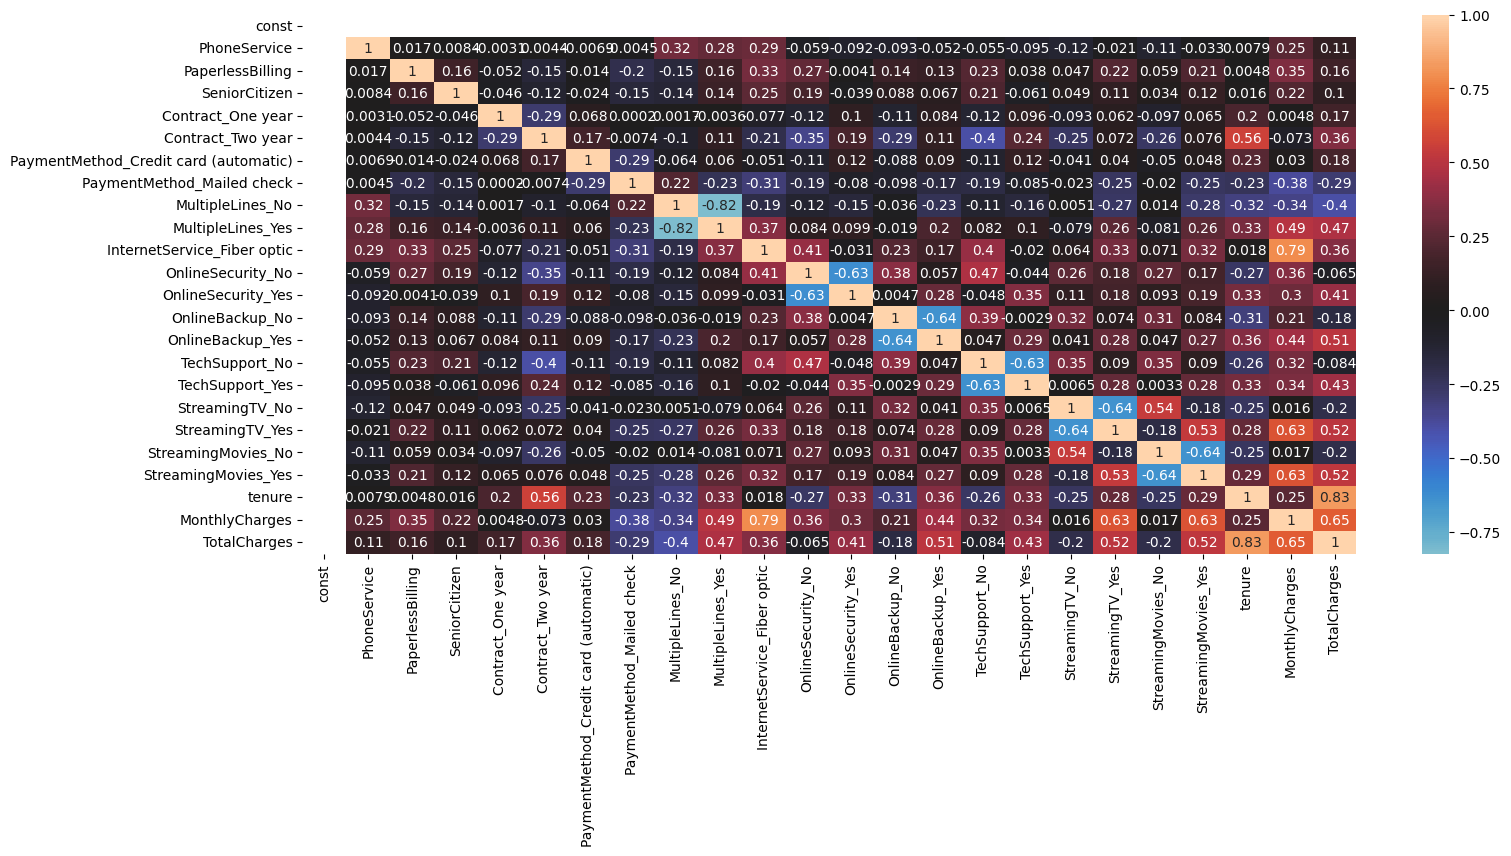

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize=(17,7))
       # Size of the figure
sns.heatmap(X.corr(),annot=True,center=0)


### **Dropping highly correlated variables**



In [ ]:
# # Write a correlation function to drop correlleation function to remove highly correlated variables (>70%)
# def correlation(dataset, threshold):
#     # Set of all the names of correlated columns
#     col_corr =
    
#     # apply corr method on dataset
#     corr_matrix = 
    
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):

#             # we are interested in absolute coeff value 
#             if # write condition here:
#                 # getting the name of column
#                 colname = 
#                 # add in col_corr 
                

    # return col_corr
    

In [ ]:
def get_correlated(df,threshold):
  correlated_columns= set()
  correlation_matrix = df.corr()
  all_columns = correlation_matrix.columns
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      correlation_value=correlation_matrix.iloc[i,j]
      if abs(correlation_value)>threshold:
        print(all_columns[i],all_columns[j],correlation_value)
        column_name=correlation_matrix.columns[i]
        correlated_columns.add(column_name)
  return correlated_columns


In [ ]:
# call the function with threshold
corr_features = get_correlated(telecom,0.7)

len(set(corr_features))

MultipleLines_Yes MultipleLines_No -0.8230760279129228
MonthlyCharges InternetService_Fiber optic 0.7871948529419366
MonthlyCharges InternetService_No -0.7631910615169536
TotalCharges tenure 0.8258804609332019


3

In [ ]:
# print corr_features

corr_features


{'MonthlyCharges', 'MultipleLines_Yes', 'TotalCharges'}

In [ ]:
# Lets drop the above variables from X

X=X.drop(list(corr_features),axis=1)


## **Dropping Variable with high VIF**



In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# empyty dataframe
vif = pd.DataFrame()

#variables names with all variables in column X
vif['Features'] = X.columns
# Vif scores for corresponding features
vif['Vif Scores'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
# print vif

vif

,Features,Vif Scores
0,const,26.600358
1,PhoneService,1.451676
2,PaperlessBilling,1.205664
3,SeniorCitizen,1.111546
4,Contract_One year,1.604685
5,Contract_Two year,2.585350
6,PaymentMethod_Credit card (automatic),1.167402
7,PaymentMethod_Mailed check,1.368714
8,MultipleLines_No,1.456002
9,InternetService_Fiber optic,1.988001


Lets drop variables which are having infinite vif scores.

they are:
    
    OnlineSecurity_No
    OnlineSecurity_Yes
    OnlineBackup_No
    OnlineBackup_Yes
    TechSupport_No
    TechSupport_Yes
    StreamingTV_No
    StreamingTV_Yes
    StreamingMovies_No
    StreamingMovies_Yes

In [ ]:
# Lets drop above variables also from X
X=X.drop(['OnlineSecurity_No',
'OnlineSecurity_Yes',
'OnlineBackup_No',
'OnlineBackup_Yes',
'TechSupport_No',
'TechSupport_Yes',
'StreamingTV_No',
'StreamingTV_Yes',
'StreamingMovies_No',
'StreamingMovies_Yes'],axis=1)



### **Checking the Correlation Matrix again**

After dropping highly correlated variables now let's check the correlation matrix again.

<Axes: >

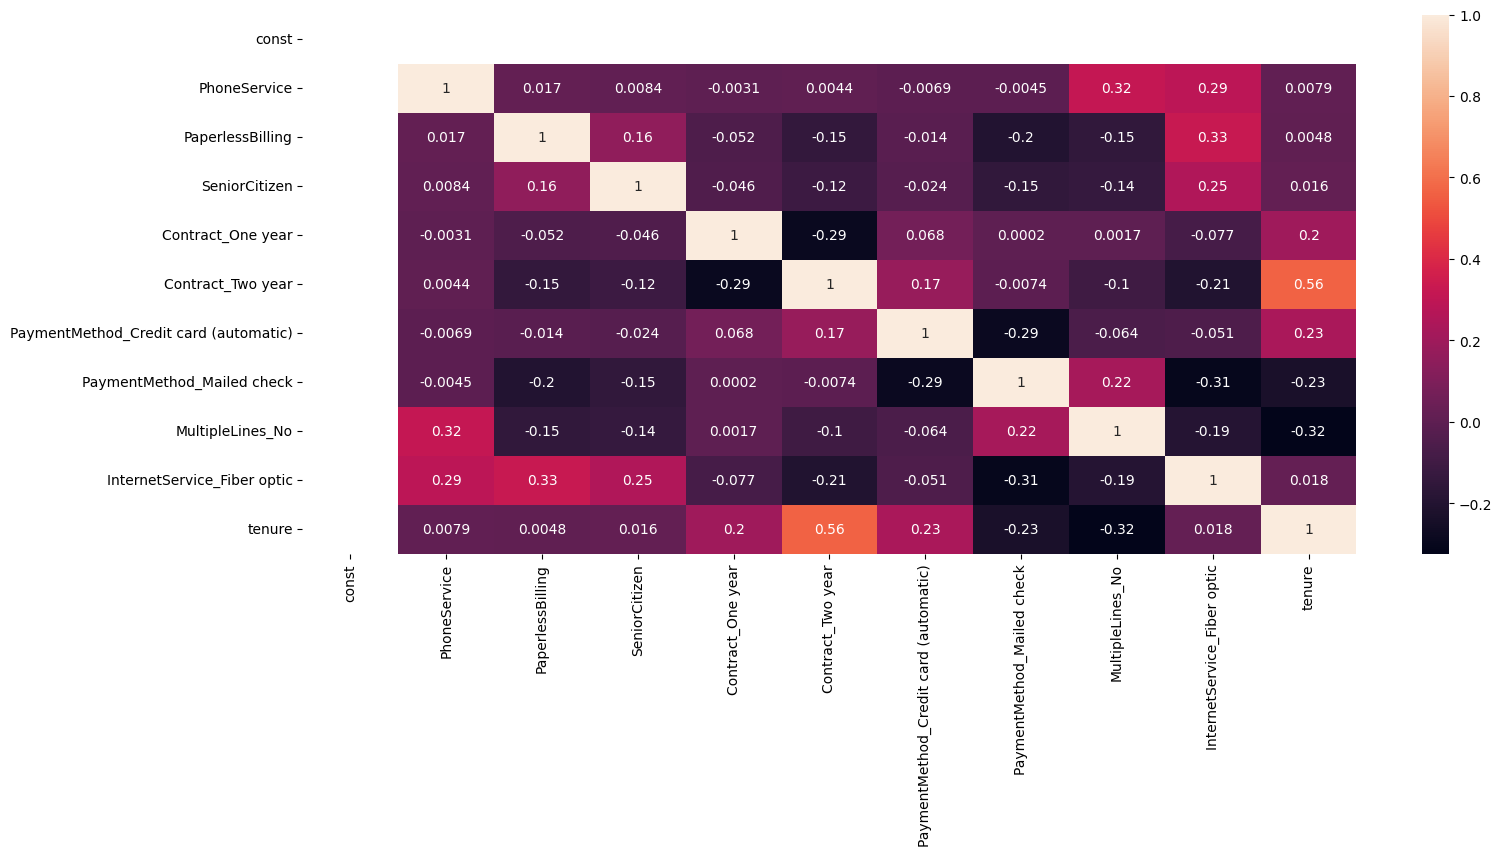

In [ ]:
plt.figure(figsize=(17,7))
sns.heatmap(X.corr(),annot=True)

### **Re-Running the Model**


Now let's run our model again after dropping highly correlated variables

In [ ]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=100)

# call logit method on sm and pass train data
logm2 = sm.Logit(y_train,X_train)

# call fit and summary on logm2
print(logm2.fit().summary())


Optimization terminated successfully.
         Current function value: 0.403610
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2109
Model:                          Logit   Df Residuals:                     2098
Method:                           MLE   Df Model:                           10
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.2794
Time:                        05:01:15   Log-Likelihood:                -851.21
converged:                       True   LL-Null:                       -1181.3
Covariance Type:            nonrobust   LLR p-value:                2.272e-135
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3108      

Now you can see after removing all multicollinear features we got all P values to zero,  so now we can say that all features are statistically significant.

### **Feature Selection Using RFE**


Lets do feature selection using LogisticRegression with RFE

In [ ]:
# import RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Initiate LogisticRegression()
logreg = LogisticRegression()


 # Initialise RFE 
rfe = RFE(logreg)
           

# fitting RFE 
rfe = rfe.fit(X,y)


# Printing the boolean results
print(rfe.support_)
    
# Printing the ranking
rfe.ranking_
           

[False  True False False  True  True  True False False  True False]


array([7, 1, 2, 3, 1, 1, 1, 4, 5, 1, 6])

In [ ]:
sel = pd.DataFrame({'TF':rfe.support_,'Fea':X.columns})
sel=sel[sel['TF']==True]
sel

,TF,Fea
1,True,PhoneService
4,True,Contract_One year
5,True,Contract_Two year
6,True,PaymentMethod_Credit card (automatic)
9,True,InternetService_Fiber optic


In [ ]:
# printing column names which were suppported by RFE

X.columns[(rfe.support_)]

Index(['PhoneService', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'InternetService_Fiber optic'],
      dtype='object')

In [ ]:
# Variables selected by RFE 
col = ['PhoneService', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'InternetService_Fiber optic']


In [ ]:
# Let's run the model using the selected variables but this time we will use Logistic Regression
# from sklearn import metrics

#initialise Logistic Regression
logsk = LogisticRegression()


#fitting model using above columns as input
logsk.fit(X_train[col],y_train)


LogisticRegression()

In [ ]:
#recreating the model with StatsModels with RFE selecte columns

logm3 = sm.Logit(y_train,X_train[col]).fit()
print(logm3.summary())



Optimization terminated successfully.
         Current function value: 0.434636
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2109
Model:                          Logit   Df Residuals:                     2104
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.2240
Time:                        05:01:16   Log-Likelihood:                -916.65
converged:                       True   LL-Null:                       -1181.3
Covariance Type:            nonrobust   LLR p-value:                3.155e-113
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
PhoneService                             -1.2106      

### **Making Predictions**


In [ ]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])


In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0,1
0,0.531015,0.468985
1,0.531015,0.468985
2,0.985595,0.014405
3,0.455075,0.544925
4,0.980568,0.019432
...,...,...
4918,0.455075,0.544925
4919,0.455075,0.544925
4920,0.980568,0.019432
4921,0.838116,0.161884


In [ ]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]


In [ ]:
# Let's see the head
y_pred_1.head()


,1
0,0.468985
1,0.468985
2,0.014405
3,0.544925
4,0.019432


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [ ]:
y_test_df

,Churn
942,0
3730,1
1761,0
2283,1
1872,0
...,...
926,1
1032,1
3181,0
1157,0


In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index


In [ ]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)


In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_pred_1,y_test_df],axis=1)


In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={1:'Churn_Probability'})


In [ ]:
#print y_pred_final
y_pred_final


,Churn_Probability,Churn,CustID
0,0.468985,0,942
1,0.468985,1,3730
2,0.014405,0,1761
3,0.544925,1,2283
4,0.019432,0,1872
...,...,...,...
4918,0.544925,1,926
4919,0.544925,1,1032
4920,0.019432,0,3181
4921,0.161884,0,1157


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID','Churn','Churn_Probability'])


In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()


,CustID,Churn,Churn_Probability
0,942,0,0.468985
1,3730,1,0.468985
2,1761,0,0.014405
3,2283,1,0.544925
4,1872,0,0.019432


In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['Predicted']=y_pred_final['Churn_Probability'].apply(lambda x: 1 if x>0.5 else 0)


In [ ]:
# Let's see the head
y_pred_final.head()


,CustID,Churn,Churn_Probability,Predicted
0,942,0,0.468985,0
1,3730,1,0.468985,0
2,1761,0,0.014405,0
3,2283,1,0.544925,1
4,1872,0,0.019432,0


### **Model Evaluation**

Choosing the right metric is very important in any classification problem.
To know about various metrics for classification model evaluation refer: 




Lets check Confusion matrix for model evaluation:

In [ ]:
# import metrics 
from sklearn import metrics


In [ ]:
# Lets check what all things python provides us in confusion matrix using help function.
help(metrics.confusion_matrix)


Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [ ]:
# get Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final['Churn'],y_pred_final['Predicted'])
confusion

array([[3019,  558],
       [ 601,  745]])

In [ ]:
# meaning of above confusion matrix is

# Predicted     not_churn    churn
# Actual
# not_churn        1363      165
# churn            273       309

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Churn'],y_pred_final['Predicted'])


0.7645744464757261

In [ ]:
# Lets check true positive ,true negatives,false positives and false negatives

TP =  confusion[0,0]              # true positive 
TN =  confusion[1,1]            # true negatives
FP =  confusion[0,1]            # false positives
FN =  confusion[1,0]             # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)


0.8339779005524862

In [ ]:
# Let us calculate specificity
TN/float(TN+FP)


0.5717574827321565

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)


0.42824251726784346

In [ ]:
# positive predictive value 
TP/float(TP+FP)


0.8440033547665642

In [ ]:
# Negative predictive value
TN/float(TN+FN)


0.5534918276374443

You can also use classification_report to get precision, recall, f1-score, support

In [ ]:
#  import classification_report

# print classification_report
print(metrics.classification_report(y_pred_final['Churn'],y_pred_final['Predicted']))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3577
           1       0.57      0.55      0.56      1346

    accuracy                           0.76      4923
   macro avg       0.70      0.70      0.70      4923
weighted avg       0.76      0.76      0.76      4923



### **ROC Curve**


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## **Watch Video 11 : ROC-AUC**

In [ ]:
# Here we have given you a function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

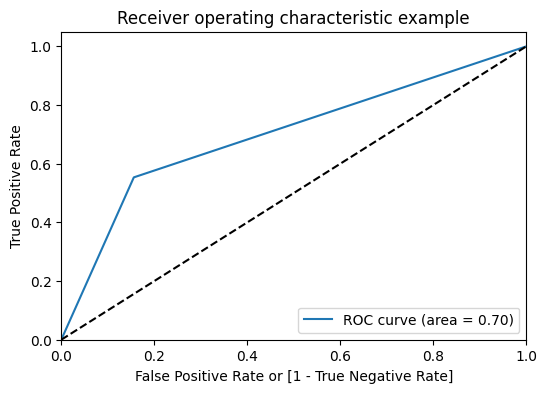

(array([0.        , 0.15599665, 1.        ]),
 array([0.        , 0.55349183, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# Use above function to plot ROC curve
draw_roc(y_pred_final['Churn'],y_pred_final['Predicted'])


### **Finding Optimal Cutoff Point**


Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [ ]:
y_pred_final.head()

,CustID,Churn,Churn_Probability,Predicted
0,942,0,0.468985,0
1,3730,1,0.468985,0
2,1761,0,0.014405,0
3,2283,1,0.544925,1
4,1872,0,0.019432,0


In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(i)/10 for i in range(10)]

# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i]= y_pred_final['Churn_Probability'].map(lambda x: 1 if x>i else 0)# code here

    
# print  y_pred_final head

y_pred_final.head()

,CustID,Churn,Churn_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.468985,0,1,1,1,1,1,0,0,0,0,0
1,3730,1,0.468985,0,1,1,1,1,1,0,0,0,0,0
2,1761,0,0.014405,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.544925,1,1,1,1,1,1,1,0,0,0,0
4,1872,0,0.019432,0,1,0,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [ ]:
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 = metrics.confusion_matrix(y_pred_final.Churn,y_pred_final[i])
    
    #total in cm1
    total1= sum(sum(cm1))
    
    #Calculate accuracy
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    #calculate specificity
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    #calculate sensitivity
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]

# print cutoff_df 
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.273411,1.000000,0.000000
0.1,0.1,0.595572,0.947251,0.463237
0.2,0.2,0.639244,0.908618,0.537881
0.3,0.3,0.747309,0.702823,0.764048
0.4,0.4,0.756652,0.616642,0.809337
0.5,0.5,0.764574,0.553492,0.844003
0.6,0.6,0.726589,0.000000,1.000000
0.7,0.7,0.726589,0.000000,1.000000
0.8,0.8,0.726589,0.000000,1.000000
0.9,0.9,0.726589,0.000000,1.000000


<Axes: xlabel='prob'>

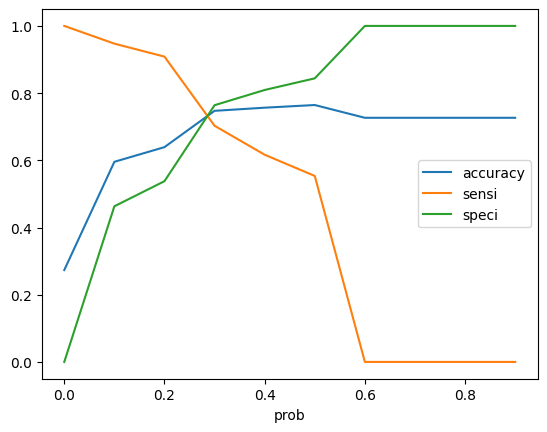

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

### **From the curve above, 0.3 is the optimum point to take it as a cutoff probability**


In [ ]:
# Now lets get another column with final_predicted which has 0.3 cutoff probability

y_pred_final['Final_Predicted'] = y_pred_final['Churn_Probability'].map(lambda x:1 if x>0.3 else 0)

In [ ]:
y_pred_final.head()


,CustID,Churn,Churn_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,942,0,0.468985,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.468985,0,1,1,1,1,1,0,0,0,0,0,1
2,1761,0,0.014405,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.544925,1,1,1,1,1,1,1,0,0,0,0,1
4,1872,0,0.019432,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Let's check the overall accuracy now again

metrics.accuracy_score(y_pred_final.Predicted,y_pred_final.Final_Predicted)

0.9010765793215519

In [ ]:
metrics.confusion_matrix(y_pred_final.Predicted,y_pred_final.Final_Predicted)


array([[3133,  487],
       [   0, 1303]])

Though this approach of finding best cutoff probability is perfectly fine, but as you can see our error got increased when cutoff is 0.3. 


The reason may be the features which we used to predict. We need go back and check them again. Else we can even try out different classification problems. 


Lets try using all the features available before doing RFE. i.e consider all features in X




In [ ]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)



In [ ]:
#initialise Logistic Regression
logs2 = LogisticRegression()


#fitting model using above columns as input
logs2.fit(X_train,y_train)


#prediction on test data
y_bred=logs2.predict(X_test)


In [ ]:
# print classification_report
print(metrics.classification_report(y_test,y_bred))



              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1528
           1       0.66      0.52      0.58       582

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [ ]:
#print confusion metrix
print(metrics.confusion_matrix(y_test,y_bred))


[[1370  158]
 [ 281  301]]


So from above result we can see that our results are improved slightly after using all the features in X